In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
import statsmodels.api as sm
from statsmodels.tsa import tsatools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots
import seaborn as sns

In [2]:
Google_df = pd.read_excel('Google Dataset.xlsx')

In [3]:
Google_df

,Month Starting,Open,High,Low,Close,Change %,Avg. Volume
0,"Dec. 01, 2022",101.38,102.59,100.67,101.28,-0.0017,21771536
1,"Nov. 01, 2022",95.59,101.45,83.45,101.45,0.0717,28294944
2,"Oct. 03, 2022",97.22,105.10,91.90,94.66,-0.0155,27843110
3,"Sep. 01, 2022",109.20,112.64,96.03,96.15,-0.1191,25381194
4,"Aug. 01, 2022",115.53,123.26,108.80,109.15,-0.0642,18737451
...,...,...,...,...,...,...,...
101,"Jul. 01, 2014",28.92,29.98,28.25,28.58,-0.0064,31411358
102,"Jun. 02, 2014",28.03,29.12,26.94,28.76,0.0275,36121936
103,"May. 01, 2014",26.35,28.39,25.16,27.99,0.0631,34808252
104,"Apr. 01, 2014",27.93,30.24,25.14,26.33,-0.0544,64037909


In [4]:
Google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Month Starting  106 non-null    object 
 1   Open            106 non-null    float64
 2   High            106 non-null    float64
 3   Low             106 non-null    float64
 4   Close           106 non-null    float64
 5   Change %        106 non-null    float64
 6   Avg. Volume     106 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 5.9+ KB


In [5]:
Google_df.isna().sum()

Month Starting    0
Open              0
High              0
Low               0
Close             0
Change %          0
Avg. Volume       0
dtype: int64

In [6]:
#Reseting the columns on the basis of years.
Google_df = Google_df.iloc[::-1].reset_index(drop=True)

In [7]:
Google_df

,Month Starting,Open,High,Low,Close,Change %,Avg. Volume
0,"Mar. 27, 2014",28.40,28.40,27.65,27.85,0.0000,432192
1,"Apr. 01, 2014",27.93,30.24,25.14,26.33,-0.0544,64037909
2,"May. 01, 2014",26.35,28.39,25.16,27.99,0.0631,34808252
3,"Jun. 02, 2014",28.03,29.12,26.94,28.76,0.0275,36121936
4,"Jul. 01, 2014",28.92,29.98,28.25,28.58,-0.0064,31411358
...,...,...,...,...,...,...,...
101,"Aug. 01, 2022",115.53,123.26,108.80,109.15,-0.0642,18737451
102,"Sep. 01, 2022",109.20,112.64,96.03,96.15,-0.1191,25381194
103,"Oct. 03, 2022",97.22,105.10,91.90,94.66,-0.0155,27843110
104,"Nov. 01, 2022",95.59,101.45,83.45,101.45,0.0717,28294944


In [8]:
correlation_matrix = Google_df.corr()

# Displaying  the correlation matrix of the stock dataset 
print(correlation_matrix)

                 Open      High       Low     Close  Change %  Avg. Volume
Open         1.000000  0.996097  0.993130  0.988203 -0.097338    -0.372177
High         0.996097  1.000000  0.994040  0.994515 -0.031083    -0.362881
Low          0.993130  0.994040  1.000000  0.995412 -0.017648    -0.417914
Close        0.988203  0.994515  0.995412  1.000000  0.038501    -0.392309
Change %    -0.097338 -0.031083 -0.017648  0.038501  1.000000    -0.144140
Avg. Volume -0.372177 -0.362881 -0.417914 -0.392309 -0.144140     1.000000


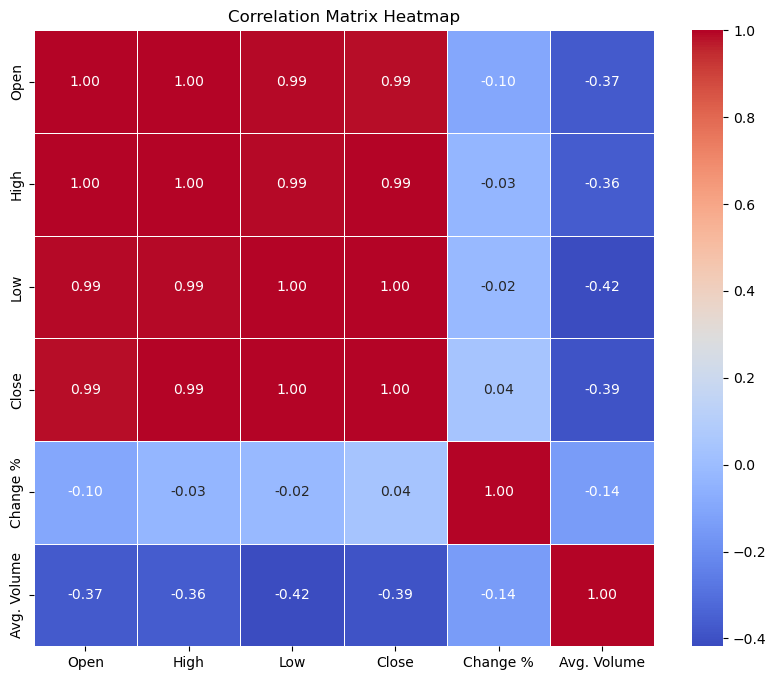

In [9]:
plt.figure(figsize=(10, 8))  # Optional: Adjust the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

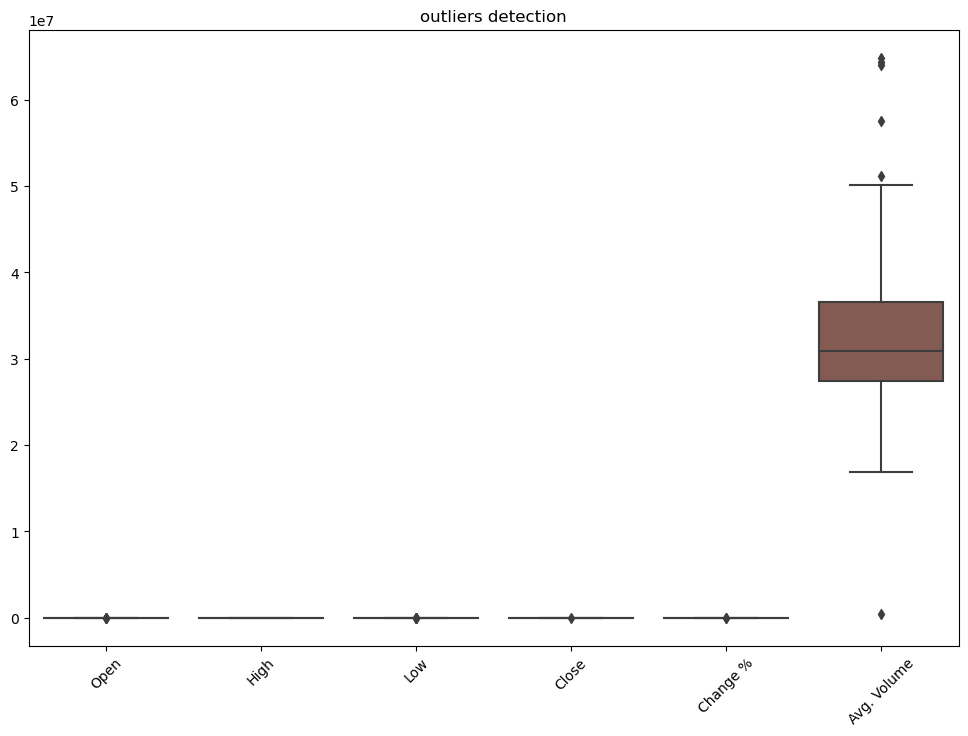

In [10]:
numeric_columns = Google_df.select_dtypes(include=[np.number])

# Create box plots for each numeric column
plt.figure(figsize=(12, 8))  # Optional: Adjust the figure size
sns.boxplot(data=numeric_columns)
plt.title('outliers detection')
plt.xticks(rotation=45)  # Optional: Rotate the x-axis labels for better visibility
plt.show()

In [11]:
#Converting the column Month Starting to datetime format.
Google_df['Month Starting'] = pd.to_datetime(Google_df['Month Starting'],errors='coerce')

In [12]:
#After converting to datetime format, calculating the number of null values and displaying them and converting them to actual values

In [13]:
Google_df.isnull().sum()[Google_df.isnull().sum()>0]

Month Starting    3
dtype: int64

In [14]:
# Find the rows with NaT values in the "Month Starting" column
rows_with_nat = Google_df[Google_df['Month Starting'].isnull()]

# Display the rows where NaT values occur
print(rows_with_nat)

   Month Starting   Open   High    Low  Close  Change %  Avg. Volume
50            NaT  50.68  55.54  50.31  54.25    0.0665     28953815
62            NaT  59.40  59.54  55.01  55.18   -0.0714     30294330
74            NaT  66.43  72.05  64.95  71.45    0.0595     31890974


In [15]:
Google_df['Month Starting'][51]

Timestamp('2018-06-01 00:00:00')

In [16]:
Google_df['Month Starting'][63]

Timestamp('2019-06-03 00:00:00')

In [17]:
Google_df['Month Starting'][75]

Timestamp('2020-06-01 00:00:00')

In [18]:
Google_df['Month Starting'][50] = pd.to_datetime('2018-05-01')
Google_df['Month Starting'][62] = pd.to_datetime('2019-05-01')
Google_df['Month Starting'][74] = pd.to_datetime('2020-05-01')

C:\Users\anjan\AppData\Local\Temp\ipykernel_13728\2549957841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Google_df['Month Starting'][50] = pd.to_datetime('2018-05-01')
C:\Users\anjan\AppData\Local\Temp\ipykernel_13728\2549957841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Google_df['Month Starting'][62] = pd.to_datetime('2019-05-01')
C:\Users\anjan\AppData\Local\Temp\ipykernel_13728\2549957841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [19]:
Google_df.isnull().sum()[Google_df.isnull().sum()>0]

Series([], dtype: int64)

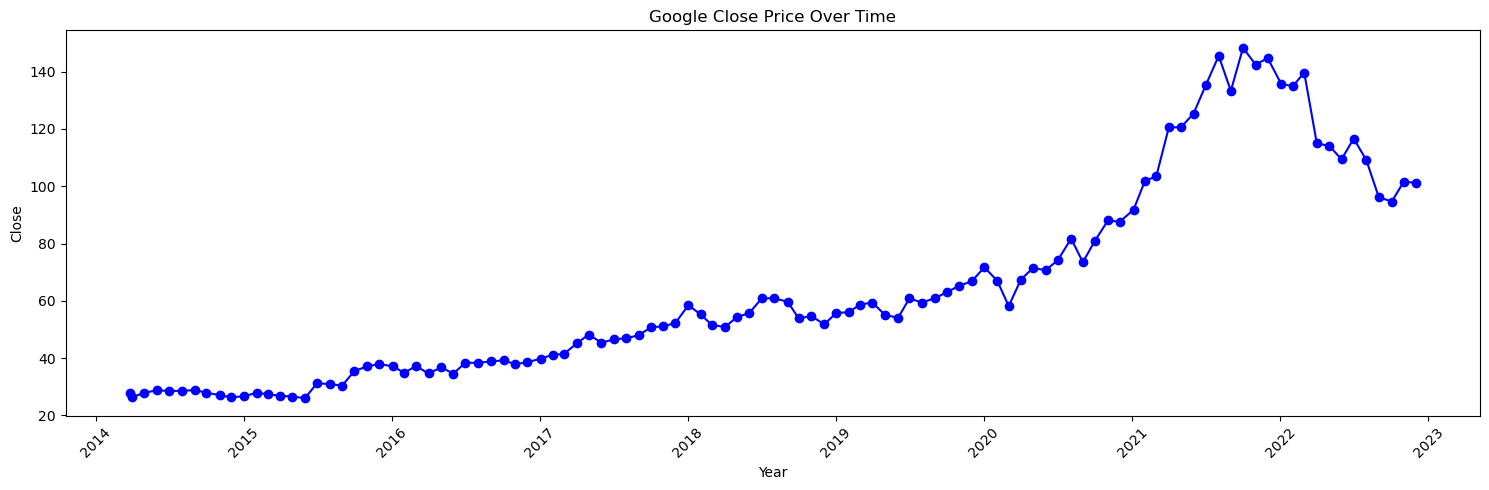

In [20]:
#Plotting close price over time to identify the trend.
plt.figure(figsize=(15, 5))
plt.plot(Google_df["Month Starting"], Google_df["Close"],marker='o', linestyle='-', color='b')
plt.xlabel("Year")
plt.ylabel("Close")
plt.title("Google Close Price Over Time")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

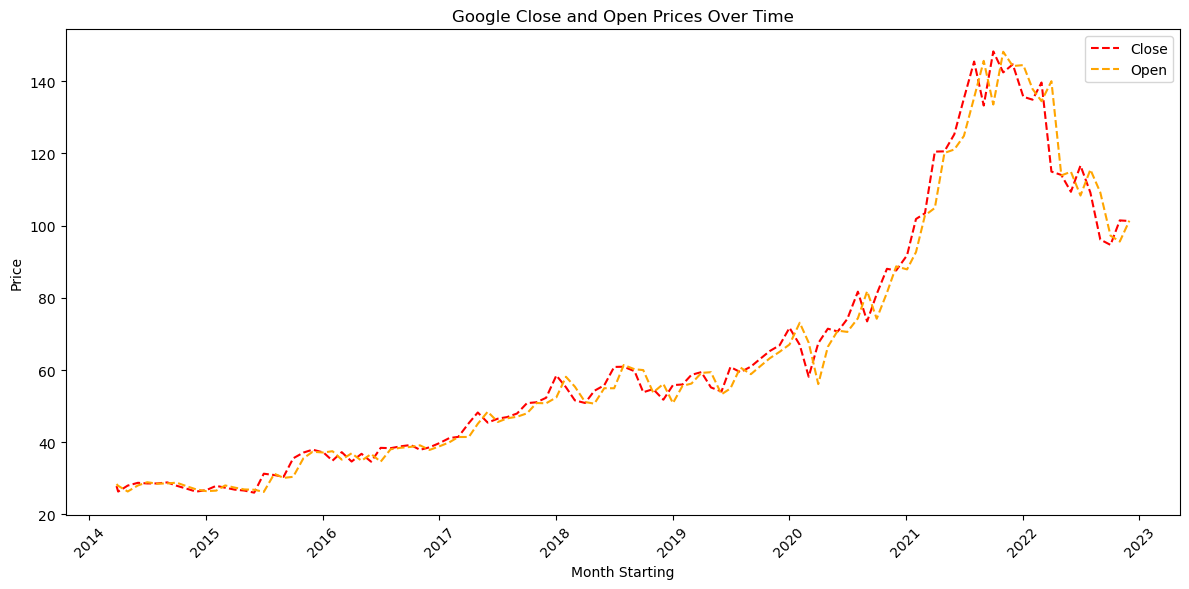

In [21]:
# Plotting the "Close" and "Open" prices over time
plt.figure(figsize=(12, 6))
plt.plot(Google_df['Month Starting'], Google_df['Close'], label='Close', color='r', linestyle='dashed')
plt.plot(Google_df['Month Starting'], Google_df['Open'], label='Open',color='orange', linestyle='dashed' )
plt.xlabel('Month Starting')
plt.ylabel('Price')
plt.title('Google Close and Open Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

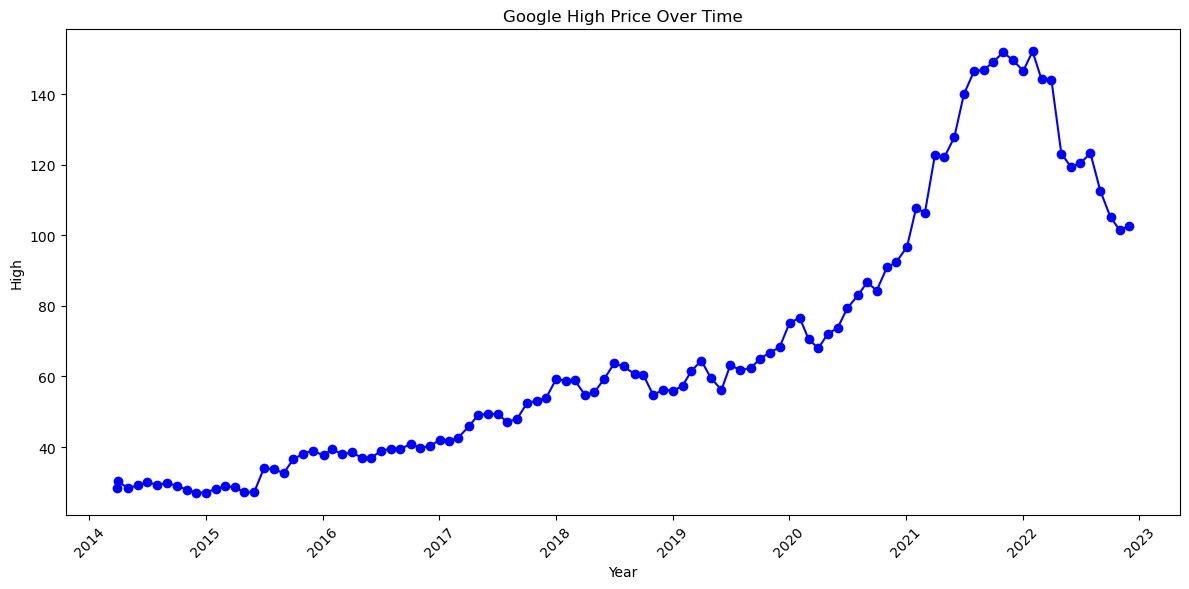

In [22]:
#Plot the pattern of highest price over time.
plt.figure(figsize=(12, 6))
plt.plot(Google_df["Month Starting"], Google_df["High"], marker='o', linestyle='-', color='b')
plt.xlabel("Year")
plt.ylabel("High")
plt.title("Google High Price Over Time")
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

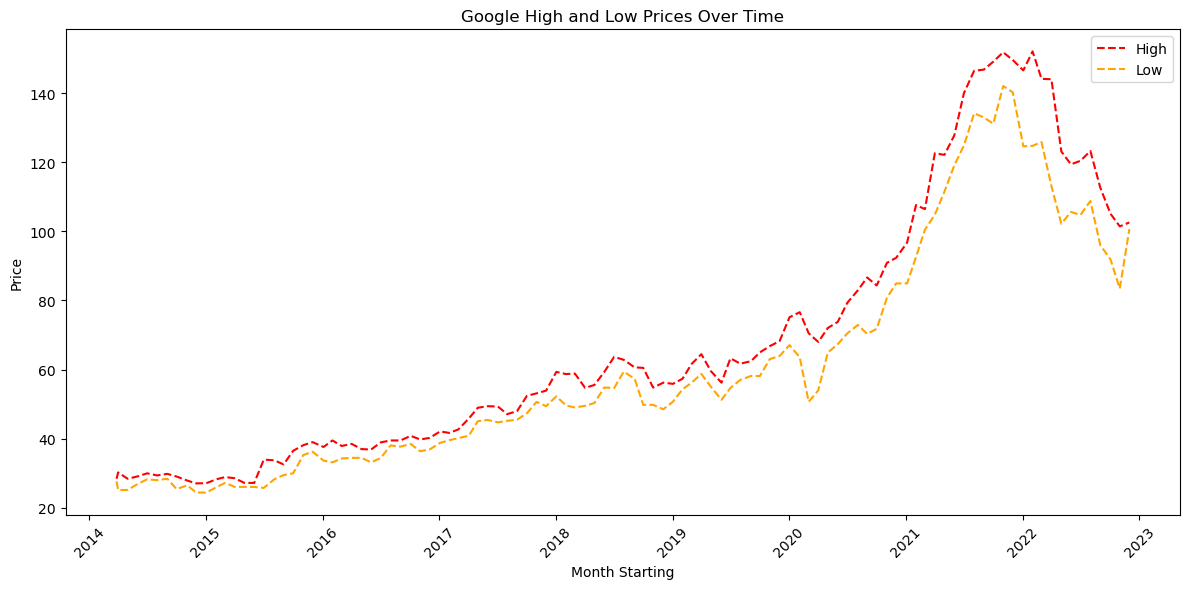

In [23]:
# Plot the "High" and "Low" prices over time
plt.figure(figsize=(12, 6))
plt.plot(Google_df['Month Starting'], Google_df['High'], label='High', color='r', linestyle='dashed')
plt.plot(Google_df['Month Starting'], Google_df['Low'], label='Low', color='orange', linestyle='dashed')
plt.xlabel('Month Starting')
plt.ylabel('Price')
plt.title('Google High and Low Prices Over Time')
plt.legend()
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

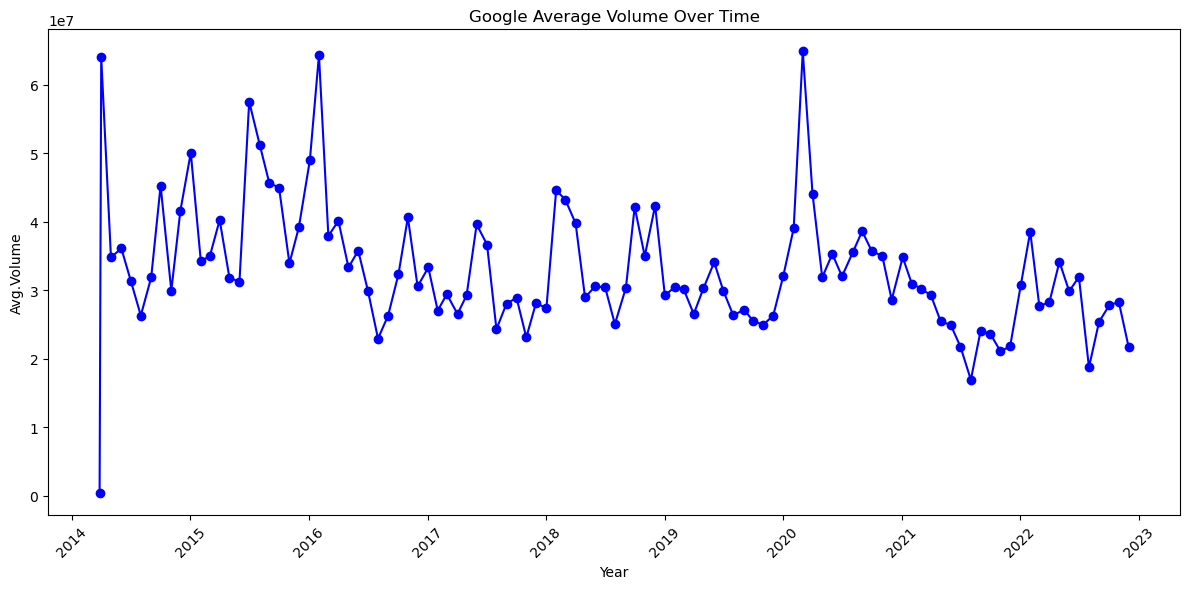

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(Google_df["Month Starting"], Google_df["Avg. Volume"],marker='o',linestyle='-', color='b')
plt.xlabel("Year")
plt.ylabel("Avg.Volume")
plt.title("Google Average Volume Over Time")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

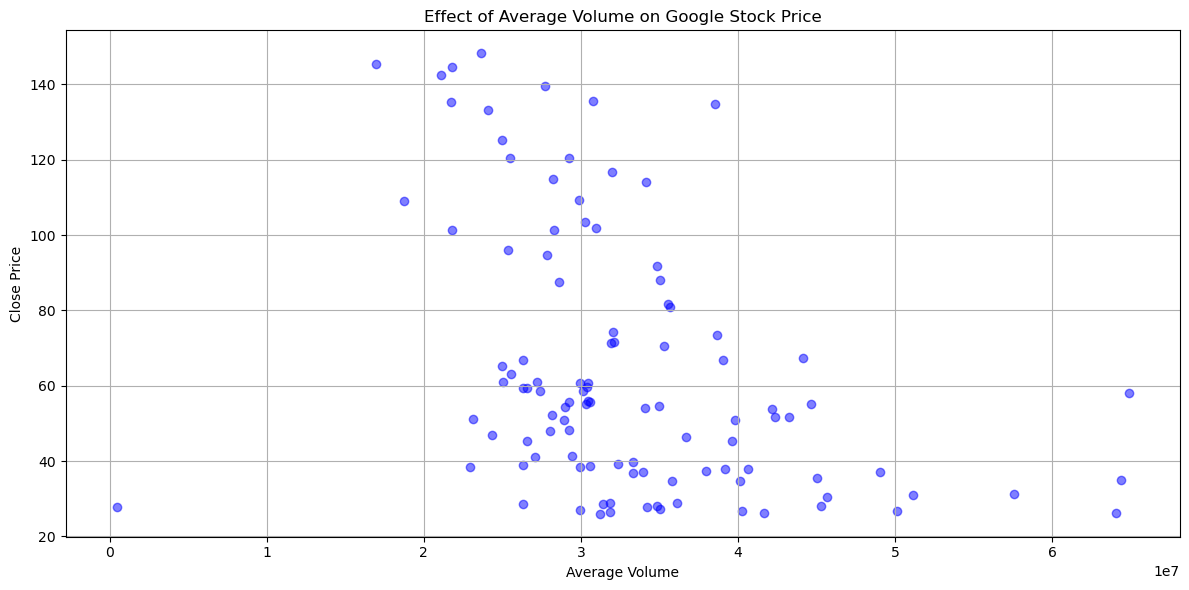

In [25]:
plt.figure(figsize=(12, 6))
plt.scatter(Google_df['Avg. Volume'], Google_df['Close'], marker='o', color='b', alpha=0.5)
plt.xlabel('Average Volume')
plt.ylabel('Close Price')
plt.title('Effect of Average Volume on Google Stock Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
# Set "Month Starting" as the index to convert the DataFrame into a time series
Google_df.set_index('Month Starting', inplace=True)

In [27]:
# Extract the "Close" prices as the time series
close_ts = pd.Series(Google_df['Close'], name='Close')

In [28]:
close_ts

Month Starting
2014-03-27     27.85
2014-04-01     26.33
2014-05-01     27.99
2014-06-02     28.76
2014-07-01     28.58
               ...  
2022-08-01    109.15
2022-09-01     96.15
2022-10-03     94.66
2022-11-01    101.45
2022-12-01    101.28
Name: Close, Length: 106, dtype: float64

In [29]:
#Centered and Trailing moving averages

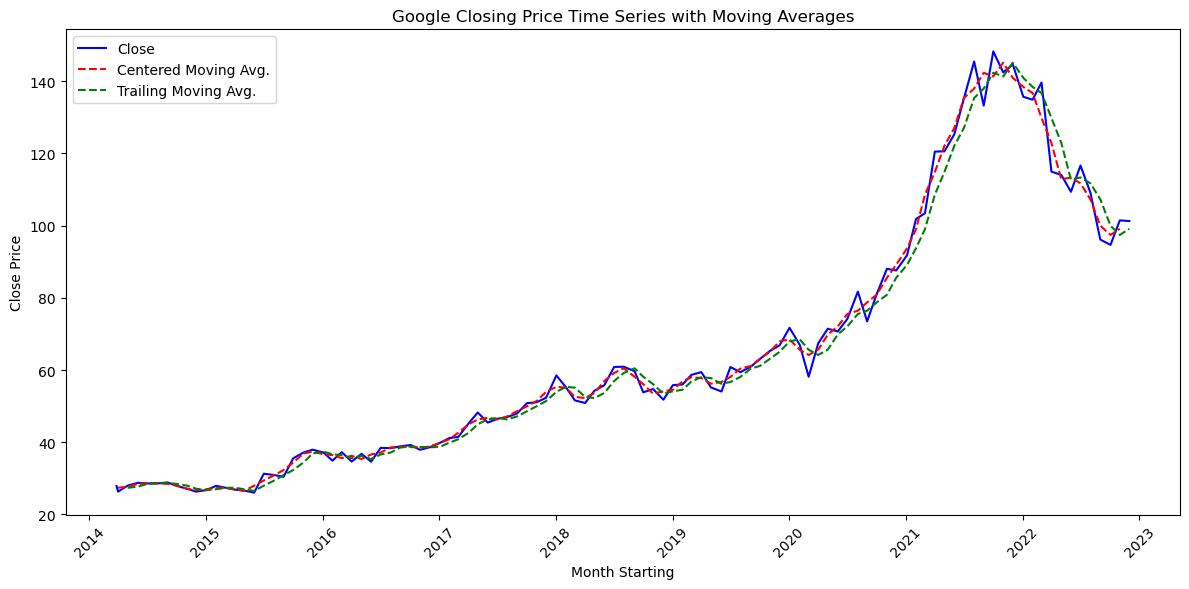

In [30]:
# Calculate the centered moving average (window size = 3)
centered_ma = close_ts.rolling(window=3, center=True).mean()

# Calculate the trailing moving average (window size = 3)
trailing_ma = close_ts.rolling(window=3).mean()

# Plot the original time series, centered moving average, and trailing moving average
plt.figure(figsize=(12, 6))
plt.plot(close_ts.index, close_ts, label='Close', color='b')
plt.plot(centered_ma.index, centered_ma, label='Centered Moving Avg.', color='r', linestyle='dashed')
plt.plot(trailing_ma.index, trailing_ma, label='Trailing Moving Avg.', color='g', linestyle='dashed')
plt.xlabel('Month Starting')
plt.ylabel('Close Price')
plt.title('Google Closing Price Time Series with Moving Averages')
plt.legend()
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

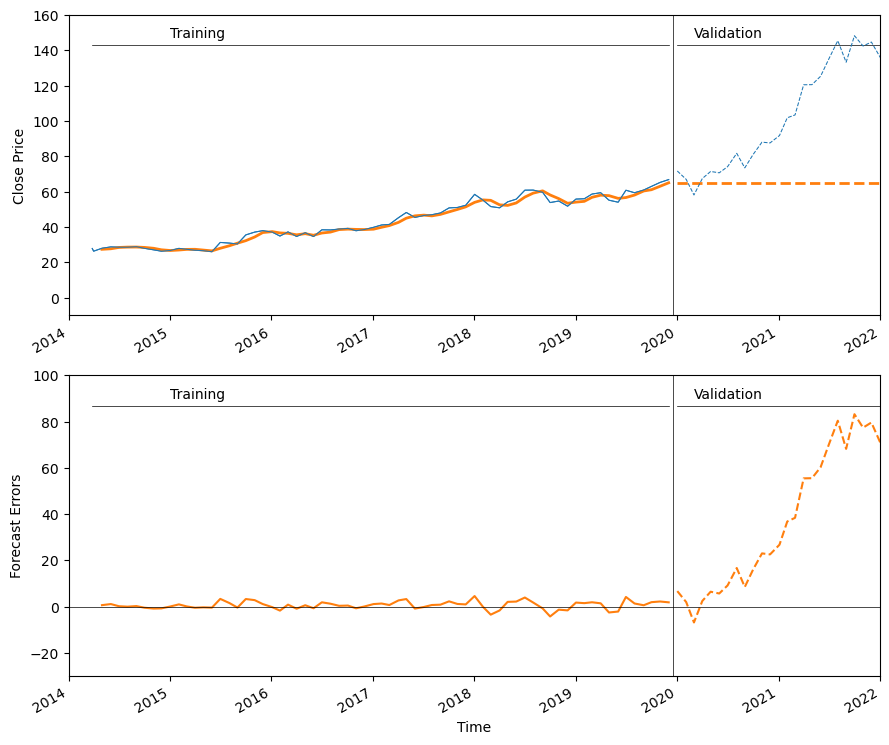

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

def singleGraphLayout(ax, ylim, train_df, valid_df):
    ax.set_xlim('2014', '2022')
    ax.set_ylim(*ylim)
    ax.set_xlabel('Time')
    one_month = pd.Timedelta('31 days')
    xtrain = (min(train_df.index), max(train_df.index))
    xvalid = (min(valid_df.index), max(valid_df.index))
    xtv = xtrain[1] + 0.5 * (xvalid[0] - xtrain[1])
    ypos = 0.9 * ylim[1] + 0.1 * ylim[0]
    ax.add_line(plt.Line2D(xtrain, (ypos, ypos), color='black', linewidth=0.5))
    ax.add_line(plt.Line2D(xvalid, (ypos, ypos), color='black', linewidth=0.5))
    ax.axvline(x=xtv, ymin=0, ymax=1, color='black', linewidth=0.5)
    ypos = 0.925 * ylim[1] + 0.075 * ylim[0]
    ax.text('2015', ypos, 'Training')
    ax.text('2020-3', ypos, 'Validation')

def graphLayout(axes, train_df, valid_df):
    singleGraphLayout(axes[0], [-10, 160], train_df, valid_df)
    singleGraphLayout(axes[1], [-30, 100], train_df, valid_df)
    train_df.plot(y='Close', ax=axes[0], color='C0', linewidth=0.75)
    valid_df.plot(y='Close', ax=axes[0], color='C0', linestyle='dashed', linewidth=0.75)
    axes[1].axhline(y=0, xmin=0, xmax=1, color='black', linewidth=0.5)
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Close Price')
    axes[1].set_ylabel('Forecast Errors')
    if axes[0].get_legend():
        axes[0].get_legend().remove()


# Partition the data into training and validation sets
nValid = 36
nTrain = len(close_ts) - nValid
train_ts = close_ts[:nTrain]
valid_ts = close_ts[nTrain:]

# Perform the moving average on training data (window size = 3)
ma_trailing = train_ts.rolling(3).mean()
last_ma = ma_trailing[-1]

# Create forecast based on the last moving average in the training period
ma_trailing_pred = pd.Series(last_ma, index=valid_ts.index)

# Plot the time series, moving average, and forecast
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 7.5))
train_ts.plot(ax=axes[0], color='C0', linewidth=0.75)
ma_trailing.plot(ax=axes[0], linewidth=2, color='C1')
ma_trailing_pred.plot(ax=axes[0], linewidth=2, color='C1', linestyle='dashed')
residual = train_ts - ma_trailing
residual.plot(ax=axes[1], color='C1')
residual = valid_ts - ma_trailing_pred
residual.plot(ax=axes[1], color='C1', linestyle='dashed')

# Apply the graph layout function
graphLayout(axes, train_ts, valid_ts)

plt.tight_layout()
plt.show()


In [32]:
#Plotting the original, trend, seasonality and residual.

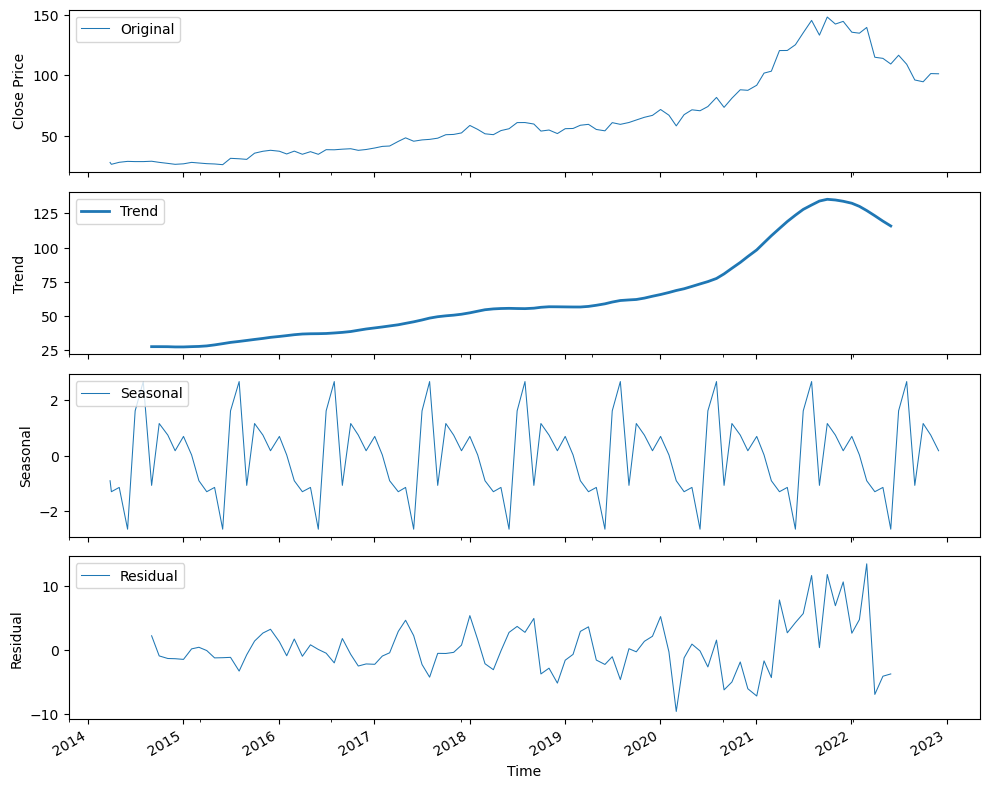

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform time series decomposition
decomposition = seasonal_decompose(close_ts, model='additive', period=12)  # Assuming seasonality period is 12 months

# Extract the components
seasonal = decomposition.seasonal
trend = decomposition.trend
residual = decomposition.resid

# Plot the components
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 8), sharex=True)

close_ts.index = pd.DatetimeIndex(close_ts.index)
close_ts.plot(ax=axes[0], label='Original', linewidth=0.75)
axes[0].legend(loc='upper left')

trend.plot(ax=axes[1], label='Trend', linewidth=2)
axes[1].legend(loc='upper left')

seasonal.plot(ax=axes[2], label='Seasonal', linewidth=0.75)
axes[2].legend(loc='upper left')

residual.plot(ax=axes[3], label='Residual', linewidth=0.75)
axes[3].legend(loc='upper left')

axes[3].set_xlabel('Time')
axes[0].set_ylabel('Close Price')
axes[1].set_ylabel('Trend')
axes[2].set_ylabel('Seasonal')
axes[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()


In [34]:
# Using advanced exponential smoothing as the data shows both trend and seasonality. Using 60% of training and the rest as testing

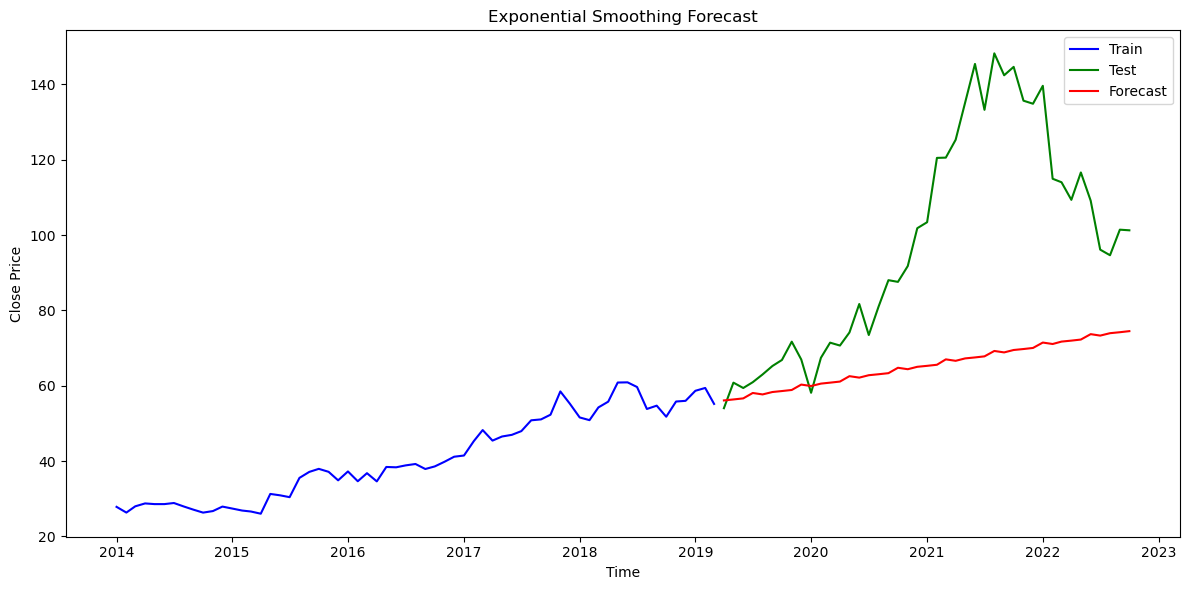

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd

# Reindex the time series with valid dates starting from 2014-01-01
start_date = '2014-01-01'
date_range = pd.date_range(start=start_date, periods=len(close_ts), freq='MS')
close_ts.index = date_range

# Split the time series into train and test sets
train_size = int(len(close_ts) * 0.6)  # Use 60% for training
train_ts, test_ts = close_ts[:train_size], close_ts[train_size:]

# Fit the model with exponential smoothing
model = ExponentialSmoothing(train_ts, trend='add', seasonal='add', seasonal_periods=5)
fitted_model = model.fit()

# Make predictions on the test set
forecast_period = len(test_ts)
forecast = fitted_model.forecast(forecast_period)

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_ts, label='Train', color='blue')
plt.plot(test_ts, label='Test', color='green')
plt.plot(forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.tight_layout()
plt.show()


In [36]:
# Use the entire dataset to predict the future values

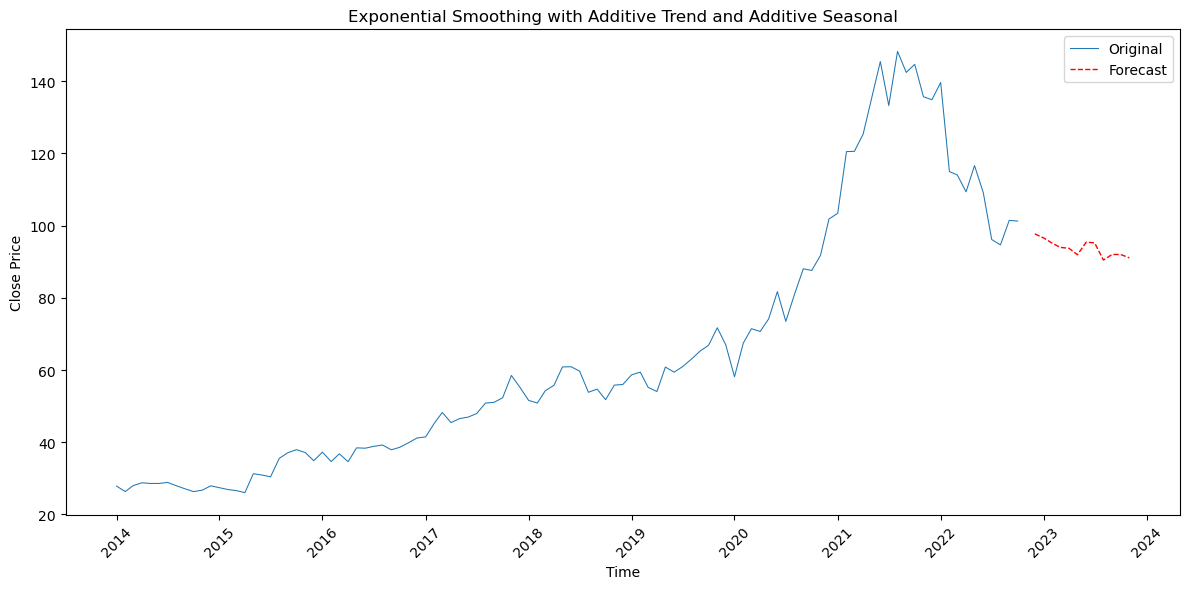

In [37]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Perform exponential smoothing with additive trend and additive seasonal components
model = ExponentialSmoothing(close_ts, trend='add', seasonal='add', seasonal_periods=12)
fitted_model = model.fit()


# Forecast the next 12 months from the last data point in 2022
forecast = fitted_model.forecast(12)

# Generate date index for the forecast
forecast_index = pd.date_range(start='2022-12-01', periods=12, freq='MS')

# Plot the original time series along with the forecast
plt.figure(figsize=(12, 6))
plt.plot(close_ts.index, close_ts, label='Original', linewidth=0.75)
plt.plot(forecast_index, forecast, label='Forecast', color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Exponential Smoothing with Additive Trend and Additive Seasonal')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [38]:
#pip install tensorflow


In [39]:
#Forecasting using LSTM
#Adusumilli, R. (2020, January 29). Predicting Stock Prices Using a Keras LSTM Model. Medium. https://towardsdatascience.com/predicting-stock-prices-using-a-keras-lstm-model-4225457f0233

Epoch 1/100
4/4 [==============================] - 2s 8ms/step - loss: 0.0237
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0194
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0159
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0130
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0104
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0085
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0069
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0059
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0052
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0047
Epoch 12/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0046
Epoch 13/100
4/4 [==============================] - 0s 7ms/st

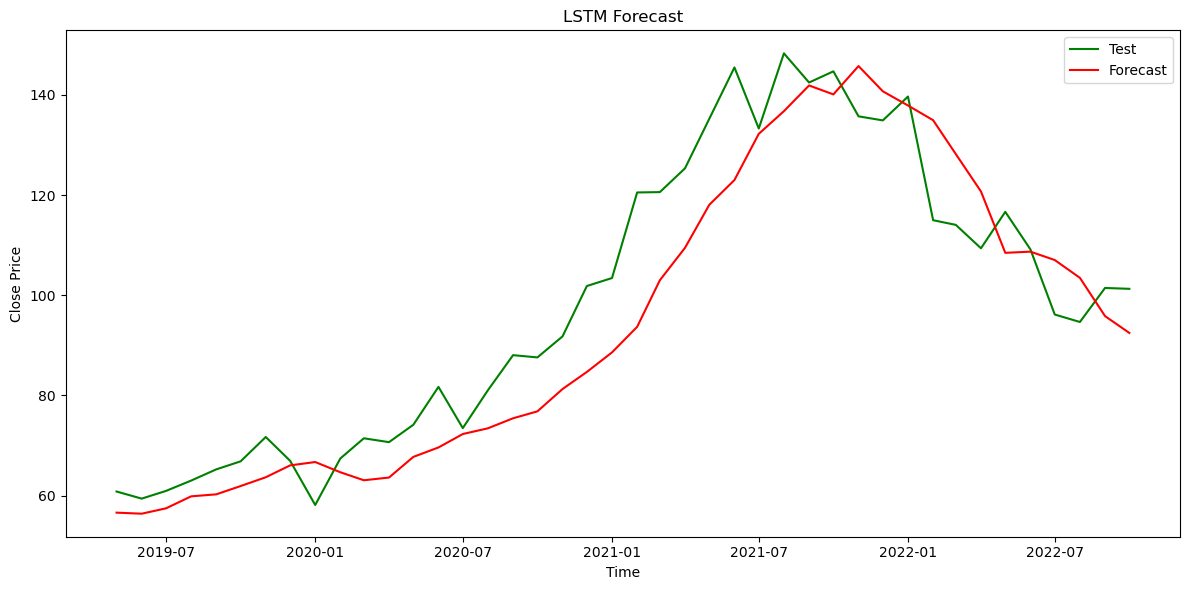

In [40]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_ts.values.reshape(-1, 1))

# Create sequences of input data (X) and corresponding output data (y)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i : i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 3  # Number of time steps to look back for each input data point
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and test sets (60% for training)
train_size = int(len(X) * 0.6)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the data for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], seq_length, 1)
X_test = X_test.reshape(X_test.shape[0], seq_length, 1)

# LSTM Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Forecasting
test_predictions = model.predict(X_test)

# Inverse transform the predictions and actual test values to get the original scale
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Plot the actual and predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(close_ts.index[train_size + seq_length:], y_test, label='Test', color='green')
plt.plot(close_ts.index[train_size + seq_length:], test_predictions, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('LSTM Forecast')
plt.legend()
plt.tight_layout()
plt.show()


In [41]:
# LSTM Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Forecasting
test_predictions = model.predict(X_test)

# Inverse transform the predictions and actual test values to get the original scale
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Print the forecasted values
print("Forecasted Values:")
print(test_predictions)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 0.0289
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0243
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0203
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0171
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0141
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0118
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0097
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0082
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0070
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0062
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 12/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0056
Epoch 13/100
4/4 [==============================] - 0s 6ms/st

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, test_predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 156218491.4594597
Root Mean Squared Error (RMSE): 12498.73959483354


In [43]:
pip install prophet


Note: you may need to restart the kernel to use updated packages.


10:51:39 - cmdstanpy - INFO - Chain [1] start processing
10:51:39 - cmdstanpy - INFO - Chain [1] done processing


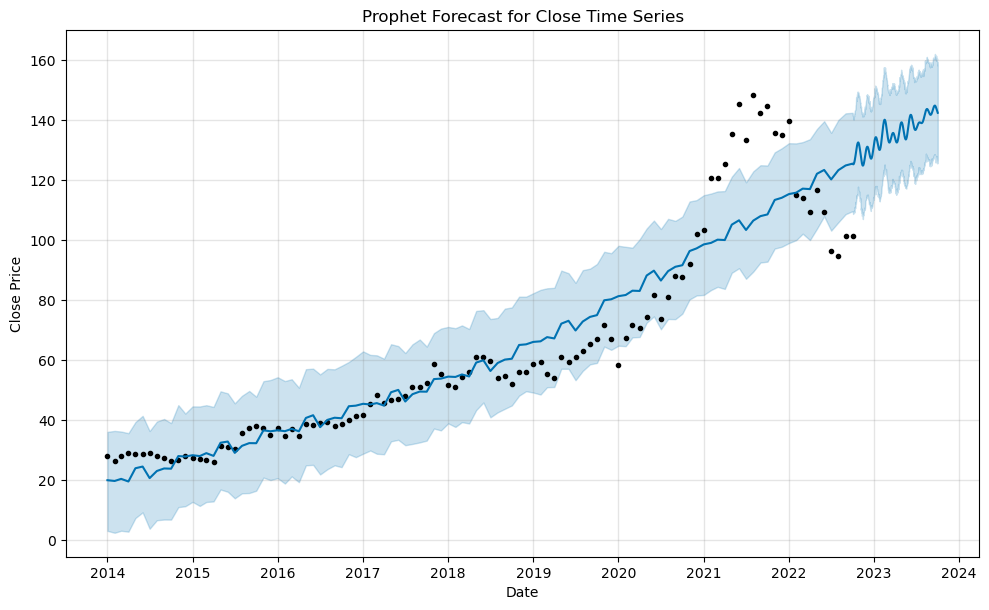

In [44]:
#Balakrishnan, H. P. (2021, November 16). Stock Prediction using Prophet (Python). Medium. https://hareeshpb.medium.com/stock-prediction-using-prophet-python-525710e1ab0c
from prophet import Prophet
df = pd.DataFrame({'ds': close_ts.index, 'y': close_ts.values})
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=365)  # Forecast for the next 365 days
# Make predictions for the future dates
forecast = model.predict(future)
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Prophet Forecast for Close Time Series')
plt.show()



In [45]:
df = pd.DataFrame({'ds': close_ts.index, 'y': close_ts.values})

# Split data into training and test sets
train_size = int(len(df) * 0.8)
train_df, test_df = df.iloc[:train_size], df.iloc[train_size:]

# Create and fit the Prophet model
model = Prophet()
model.fit(train_df)

# Make predictions for the test set
forecast = model.predict(test_df)
y_pred = forecast['yhat'].values

# Get the actual values from the test set
y_true = test_df['y'].values

# Calculate RMSE and MAPE
mse = np.mean((y_pred - y_true) ** 2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

10:51:40 - cmdstanpy - INFO - Chain [1] start processing
10:51:41 - cmdstanpy - INFO - Chain [1] done processing


Root Mean Squared Error (RMSE): 31.272656361956184
Mean Absolute Percentage Error (MAPE): 20.913033563765204


In [46]:
# Prophet method is better as it has low RMSE and MAPE.